## Exploratory data analysis

In this module we will cover some simple methods to explore, correct and analyse the content of a dataset.
We will use the "large rivers" dataset as example, as it will be used in the following modules.
This notebook uses methods from three common python libraries, namely *numpy*, *pandas*, and *matplotlib*.
It can, therefore, also serve as recap for those of you who haven't coded in python for a while.

Please, note that some small exercises are scattered along the notebook. 
We strongly encourage you to solve the exercises before the next live session, when we will provide a possible solution.

**1. Load libraries and data**

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read dataframe from xlsx file
file_url = 'https://github.com/DHI/Intro_ML_course/raw/main/module_1/large_rivers.xlsx'
df = pd.read_excel(file_url, sheet_name='data')

# If you are unable to read the file from the url, you can download it and read it locally 
# Type the correct file path and import with pandas
# file_path = 'large_rivers_mod.xlsx'
# df = pd.read_excel(file_path, sheet_name='data')

In [3]:
# Read table of units from xlsx file
units = pd.read_excel(file_url, sheet_name='units')

# Print units
units

,Feature,Unit,Note
0,Length,km,From source to outlet
1,Width,m,Average over the course
2,Area,km2,Extension of draining catchment
3,Flow acc.,km2,Upstream contributing area
4,Discharge,m3/s,"Average over observation period, near outlet"
5,Precipitation,mm,Annual average over observation period
6,Wet days,-,Average per year over observation period
7,Temperature,°C,Average over observation period
8,Elevation,m,Average over draining catchment
9,Longitude,DD (decimal degrees),Center of draining catchment


**2. Initial Inspection**

- Data Structure: Understand the number of rows (samples) and columns (features) using df.shape.
- Column Data Types: Check the types of each column using df.dtypes.
- Preview Data: Quickly view the first and last rows with df.head() and df.tail()

In [4]:
print(df.shape) # (rows, columns)

(98, 13)


In [5]:
print(df.dtypes) # Data types of each column

Name              object
Continent         object
Length             int64
Width              int64
Area               int64
Flow acc.          int64
Discharge          int64
Precipitation      int64
Wet days           int64
Temperature      float64
Elevation          int64
Longitude        float64
Latitude         float64
dtype: object


In [6]:
df.head() # First 5 rows

,Name,Continent,Length,Width,Area,Flow acc.,Discharge,Precipitation,Wet days,Temperature,Elevation,Longitude,Latitude
0,Amazon,South America,6400,3335,6112000,5219882,209000,2472,241,26.5,72,-63.532959,-3.844903
1,Congo,Africa,4370,1917,4014500,3166802,41200,1597,121,24.9,414,17.650391,-0.646173
2,Ganges-Brahmaputra,Asia,2704,1969,1731334,1481413,38129,2135,96,16.5,1550,91.692383,26.171942
3,Orinoco,South America,2250,702,989000,929985,37740,2114,163,25.7,373,-64.820312,7.666523
4,Guainia,South America,2230,1200,691000,8801,35943,2787,232,26.7,103,-65.509326,-0.287921


**3. Summary Statistics**

- Descriptive Statistics: Use df.describe() for central tendency, spread, and shape of the dataset’s distribution.
- Unique Values: For categorical columns, check the unique values and their counts.

In [7]:
df.describe() # Summary statistics

,Length,Width,Area,Flow acc.,Discharge,Precipitation,Wet days,Temperature,Elevation,Longitude,Latitude
count,98.000000,98.000000,9.800000e+01,9.800000e+01,98.000000,98.000000,98.000000,97.000000,98.000000,98.000000,98.000000
mean,2133.469388,633.285714,7.606181e+05,6.378048e+05,10256.887755,1439.765306,146.061224,15.503093,580.306122,12.090775,20.547458
std,1362.712223,551.433652,9.880547e+05,8.569506e+05,22018.872206,868.038942,52.804798,12.257680,656.302473,84.875039,26.481475
min,74.000000,78.000000,4.000000e+04,1.546000e+03,2000.000000,18.000000,6.000000,-13.200000,24.000000,-151.185547,-27.850763
25%,1181.000000,270.000000,1.486922e+05,1.074285e+05,2766.250000,614.000000,112.250000,6.600000,224.750000,-66.314868,-3.333551
50%,1737.500000,468.000000,3.575260e+05,3.027515e+05,4815.500000,1429.500000,140.500000,21.300000,383.000000,18.284009,20.294745
75%,2702.750000,779.500000,9.576475e+05,7.575735e+05,9635.000000,2047.250000,185.000000,25.400000,661.250000,94.123657,44.392707
max,6853.000000,3335.000000,6.112000e+06,5.219882e+06,209000.000000,4037.000000,258.000000,28.400000,4105.000000,152.921875,71.668158


In [8]:
print(df['Continent'].value_counts()) # Count of each value in categorical variable

Continent
Asia             37
South America    31
Africa           12
North America    11
Europe            3
Oceania           3
Name: count, dtype: int64


**4. Data Cleaning**

- Missing Values: Identify and handle missing values. You can use df.isnull().sum() to check for missing values.
- Duplicates: Check and remove duplicate rows if they exist.

In [9]:
print(df.isnull().sum()) # Count of missing values in each column

Name             0
Continent        1
Length           0
Width            0
Area             0
Flow acc.        0
Discharge        0
Precipitation    0
Wet days         0
Temperature      1
Elevation        0
Longitude        0
Latitude         0
dtype: int64


In [10]:
df[df['Continent'].isnull()] # Find rivers with missing continent

,Name,Continent,Length,Width,Area,Flow acc.,Discharge,Precipitation,Wet days,Temperature,Elevation,Longitude,Latitude
68,Rhine,NaN,1233,222,198735,145005,2900,728,185,9.1,141,7.174951,50.698993


In [11]:
df.loc[df['Name'] == 'Rhine', 'Continent'] = 'Europe' # Assign Europe to Rhine river

df[df['Name'] == 'Rhine'] # Check that Rhine river has been assigned to Europe

,Name,Continent,Length,Width,Area,Flow acc.,Discharge,Precipitation,Wet days,Temperature,Elevation,Longitude,Latitude
68,Rhine,Europe,1233,222,198735,145005,2900,728,185,9.1,141,7.174951,50.698993


In [12]:
df[df['Temperature'].isnull()] # Find river with missing temperature

,Name,Continent,Length,Width,Area,Flow acc.,Discharge,Precipitation,Wet days,Temperature,Elevation,Longitude,Latitude
27,Putumayo,South America,1813,645,148000,85918,8520,2968,241,NaN,400,-73.187012,-1.799493


In [13]:
# Find temperature statistics for rivers in Souther America
df[df['Continent'] == 'South America']['Temperature'].describe()

count    30.000000
mean     24.710000
std       2.015175
min      19.000000
25%      24.000000
50%      25.500000
75%      25.975000
max      26.900000
Name: Temperature, dtype: float64

**Exercise 1.1**

Assign mean temperature of South American rivers to Putumayo river.
Then, check that the value has been assigned correclty



In [14]:
# 1.1 Solution

# Assign mean temperature of South America to Putumayo river
df.loc[df['Name'] == 'Putumayo', 'Temperature'] = 24.7

# Check that Putumayo river has been assigned the mean temperature of South America
df[df['Name'] == 'Putumayo']

,Name,Continent,Length,Width,Area,Flow acc.,Discharge,Precipitation,Wet days,Temperature,Elevation,Longitude,Latitude
27,Putumayo,South America,1813,645,148000,85918,8520,2968,241,24.7,400,-73.187012,-1.799493


In [15]:
# Check duplicate rivers by name
df[df.duplicated(subset=['Name'])].shape

(0, 13)

**5. Visual Exploratory Data Analysis**

- Bar Charts: For categorical data distribution.
- Histograms: For understanding the distribution of individual numeric variables.
- Box Plots: To visualize basic summary statistics and detect outliers.
- Scatter Plots: To understand relationships between two numerical variables.
- Correlation Heatmaps: To identify relationships between numerical columns.

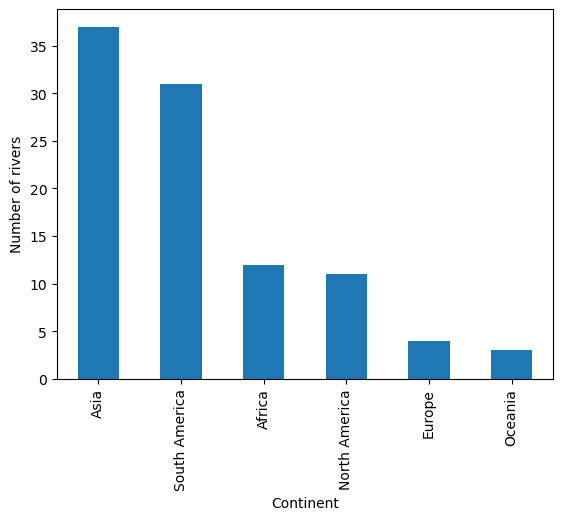

In [16]:
# Plot number of rivers per continent
df['Continent'].value_counts().plot(kind='bar')
plt.ylabel('Number of rivers')
plt.show()

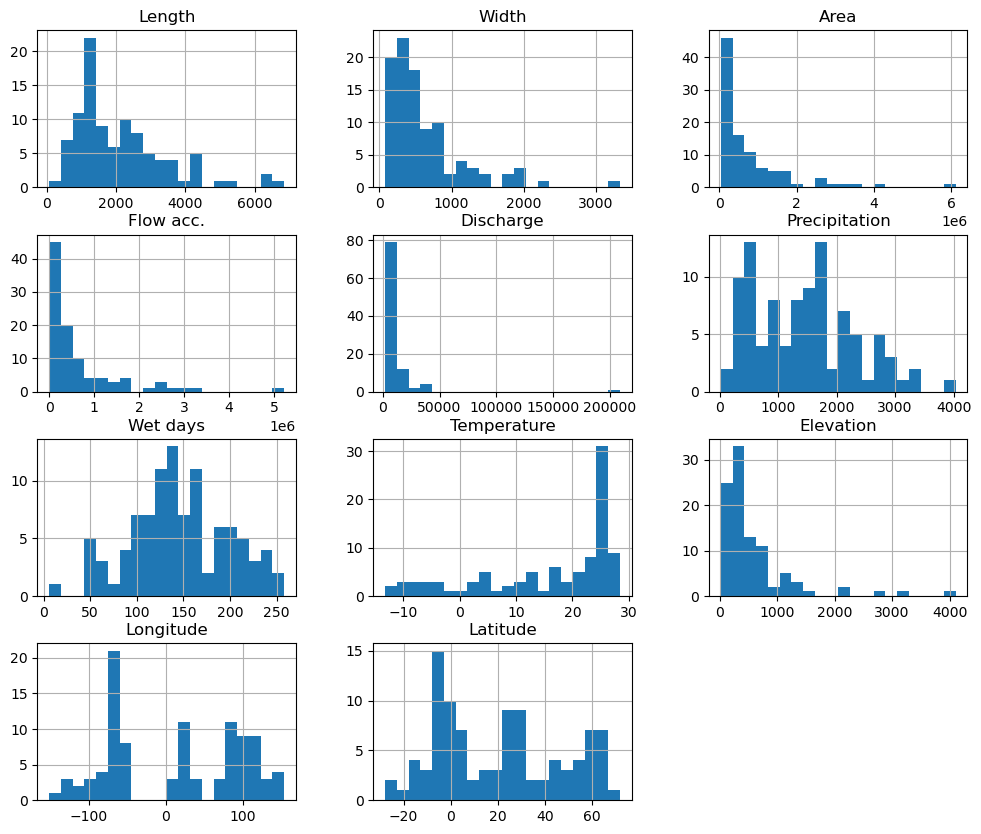

In [17]:
# Plot histograms of all numeric columns
df.hist(figsize=(12, 10), bins=20)
plt.show()

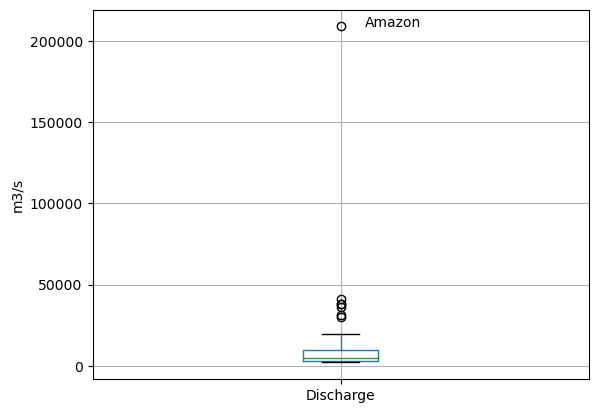

In [18]:
# Plot boxplot of discharge
df.boxplot(column='Discharge')
plt.ylabel('m3/s')

#'''
# Add label for river with largest discharge
max_discharge_river = df.loc[df['Discharge'].idxmax(), 'Name']
max_discharge = df['Discharge'].max()
plt.annotate(max_discharge_river, 
             xy=(1, max_discharge), xytext=(1.05, max_discharge))

plt.show()
#'''

**Exercise 1.2**

Plot boxplot of discharge only in the range from 0 to 50000 m3/s

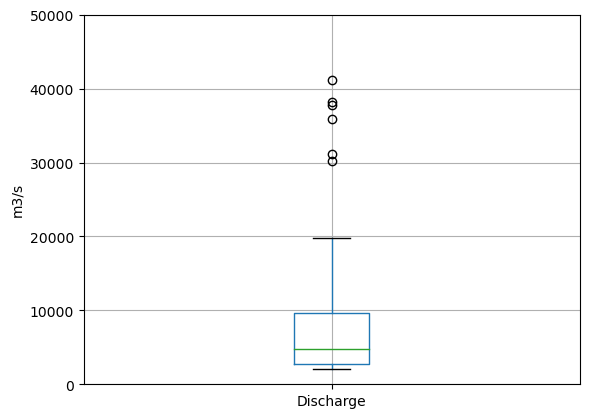

In [19]:
# 1.2 Solution 

df.boxplot(column='Discharge')
plt.ylabel('m3/s')
plt.ylim(0, 50000)
plt.show()

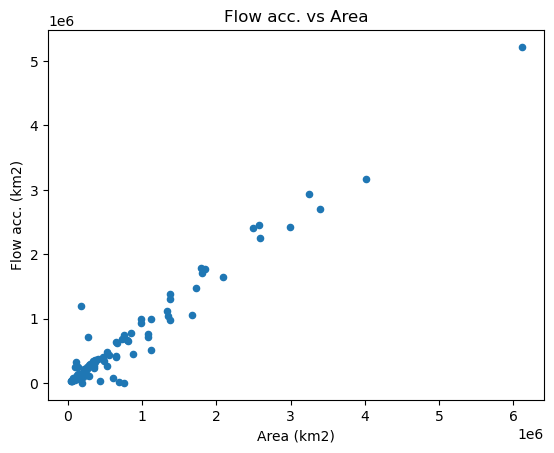

In [20]:
# Scatter plot of Area vs Flow accumulation
df.plot.scatter(x='Area', y='Flow acc.')
plt.xlabel('Area (km2)')
plt.ylabel('Flow acc. (km2)')
plt.title('Flow acc. vs Area')
plt.show()

**Exercise 1.3**

Compute the relative difference between flow acculumation and area as *rel_diff = (flow acc. - area)/area*.
Then, plot the histogram of the result to better visualize the difference between the two features.

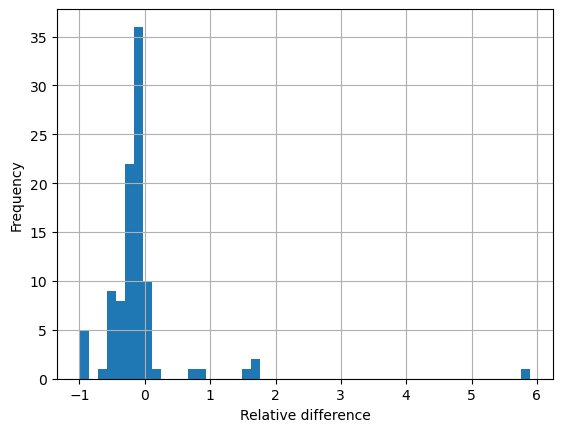

In [21]:
#1.3 Solution

rel_diff = ( df['Flow acc.']- df['Area'])/df['Area']

rel_diff.hist(bins=50)
plt.xlabel('Relative difference')
plt.ylabel('Frequency')
plt.show()

In [22]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
cor_matrix = numeric_df.corr(method='pearson')

# Print correlation values for Discharge
cor_matrix['Discharge'].sort_values(ascending=False)

Discharge        1.000000
Area             0.685767
Width            0.669335
Flow acc.        0.667990
Length           0.449810
Wet days         0.209446
Precipitation    0.183950
Temperature      0.123820
Elevation       -0.077188
Longitude       -0.102225
Latitude        -0.130310
Name: Discharge, dtype: float64

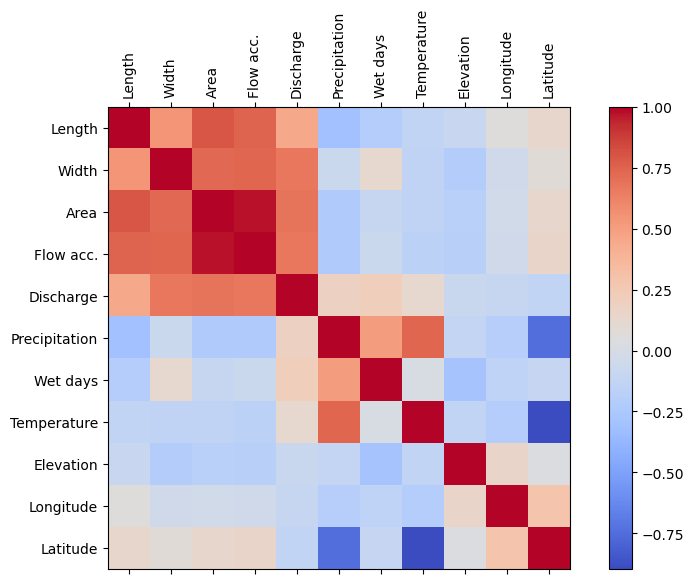

In [23]:
# Create the heatmap
fig, ax = plt.subplots(figsize=(10, 6))
cax = ax.matshow(cor_matrix, cmap='coolwarm')
fig.colorbar(cax)

# Set up the axis labels
plt.xticks(range(len(cor_matrix.columns)), cor_matrix.columns, rotation=90)
plt.yticks(range(len(cor_matrix.columns)), cor_matrix.columns)

# Show plot
plt.show()

**Exercise 1.4**

Plot heatmap of a new correlation matrix that inlcudes only discharge, area, width, and length, wet days and precipitation.

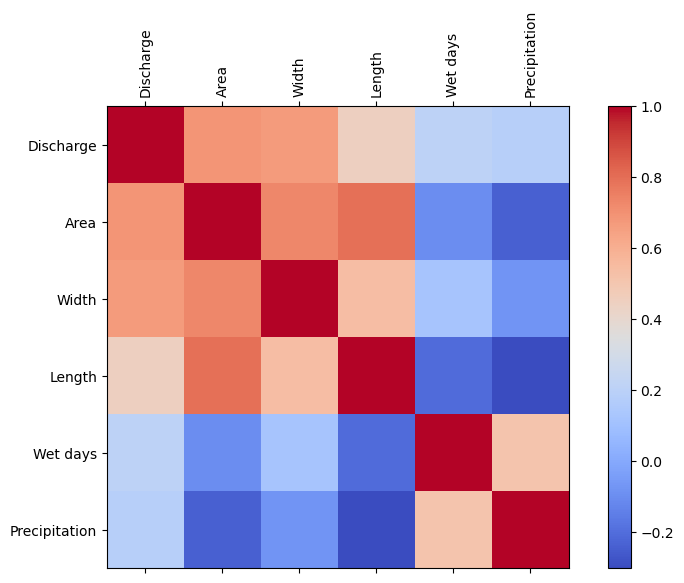

In [24]:
# 1.4 Solution

# Compute new correlation matrix
cor_matrix = df[['Discharge', 'Area', 'Width', 'Length', 'Wet days', 'Precipitation']].corr(method='pearson')

# Plot heatmap
fig, ax = plt.subplots(figsize=(10, 6))
cax = ax.matshow(cor_matrix, cmap='coolwarm')
fig.colorbar(cax)
plt.xticks(range(len(cor_matrix.columns)), cor_matrix.columns, rotation=90)
plt.yticks(range(len(cor_matrix.columns)), cor_matrix.columns)
plt.show()

In [25]:
# Remove flow accumulation from dataframe
df = df.drop('Flow acc.', axis=1)

In [26]:
# Save processed dataframe to csv file
df.to_csv('large_rivers_processed.csv', index=False)